In [1]:
import pandas as pd #pandas convert list(csv) into dict ,here pd is object
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("titanic.csv") #return an object
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.columns     # get information about coloumn name

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()    # get information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.dtypes  # get information about datatype

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [8]:
len(data.select_dtypes(['int64', 'float64']).columns)

7

In [9]:
data.shape   # get information about shape of dataset

(891, 12)

In [10]:
print("Number of columns: ",len(data.columns))
print("Number of rows: ",len(data))

Number of columns:  12
Number of rows:  891


In [11]:
data.duplicated().sum()      # get information about duplicate data

0

In [12]:
data.isna().sum()     # get information about missing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data.isna().sum().sort_values(ascending=False) * 100. / len(data)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

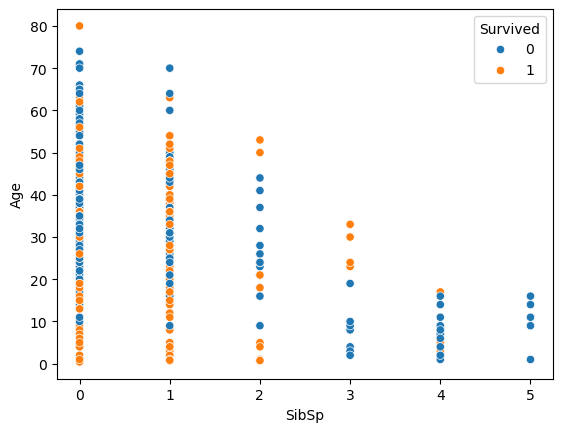

In [48]:
sns.scatterplot(x='SibSp', y='Age', hue='Survived',data=data)
plt.show()

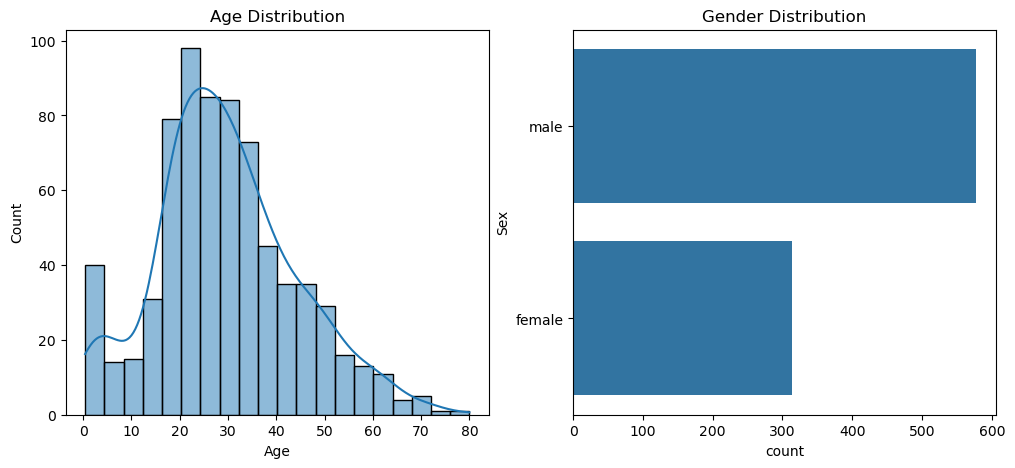

In [50]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'].dropna(), kde=True )
plt.title('Age Distribution')
plt.subplot(1, 2, 2)
sns.countplot(data['Sex'])
plt.title('Gender Distribution')
plt.show()

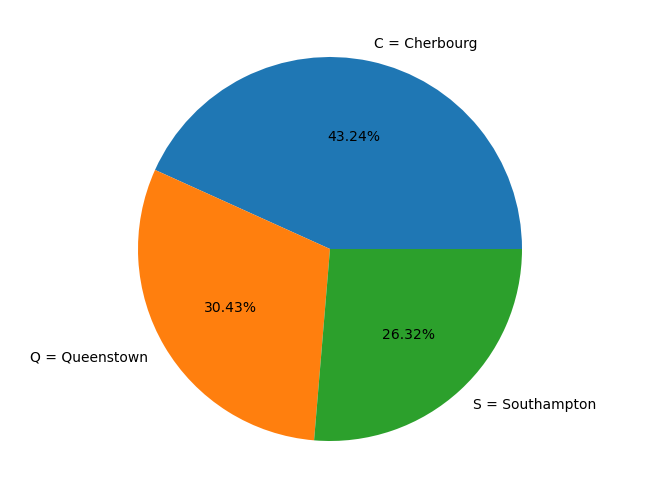

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

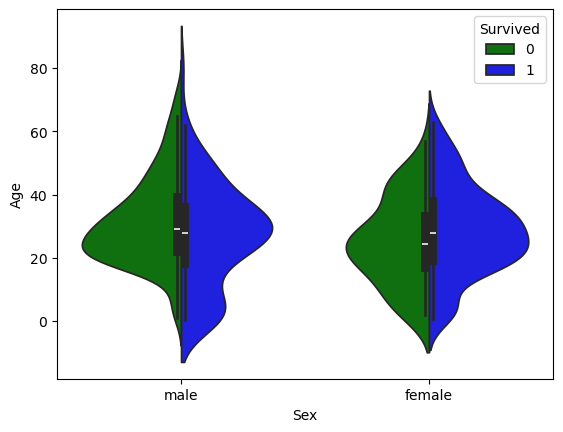

In [14]:
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived' ,palette = ['green', 'blue'], data = data , split = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6692\3235488362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Pclass', y = 'Age', palette = 'winter', data = data)


<Axes: xlabel='Pclass', ylabel='Age'>

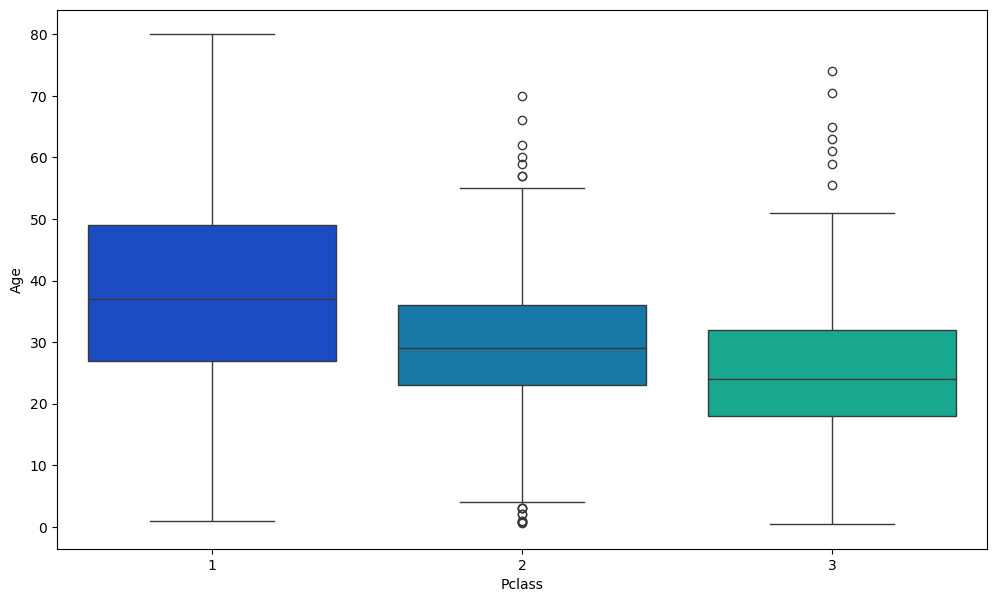

In [15]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', palette = 'winter', data = data)

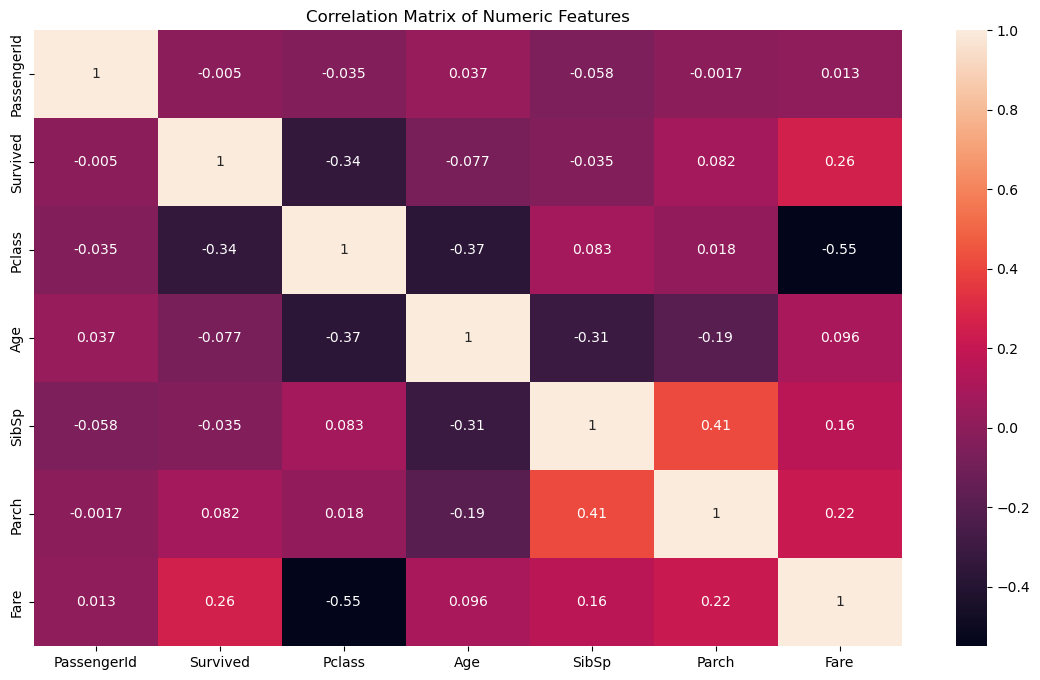

In [16]:
numeric_df = data.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation = numeric_df.corr()
# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

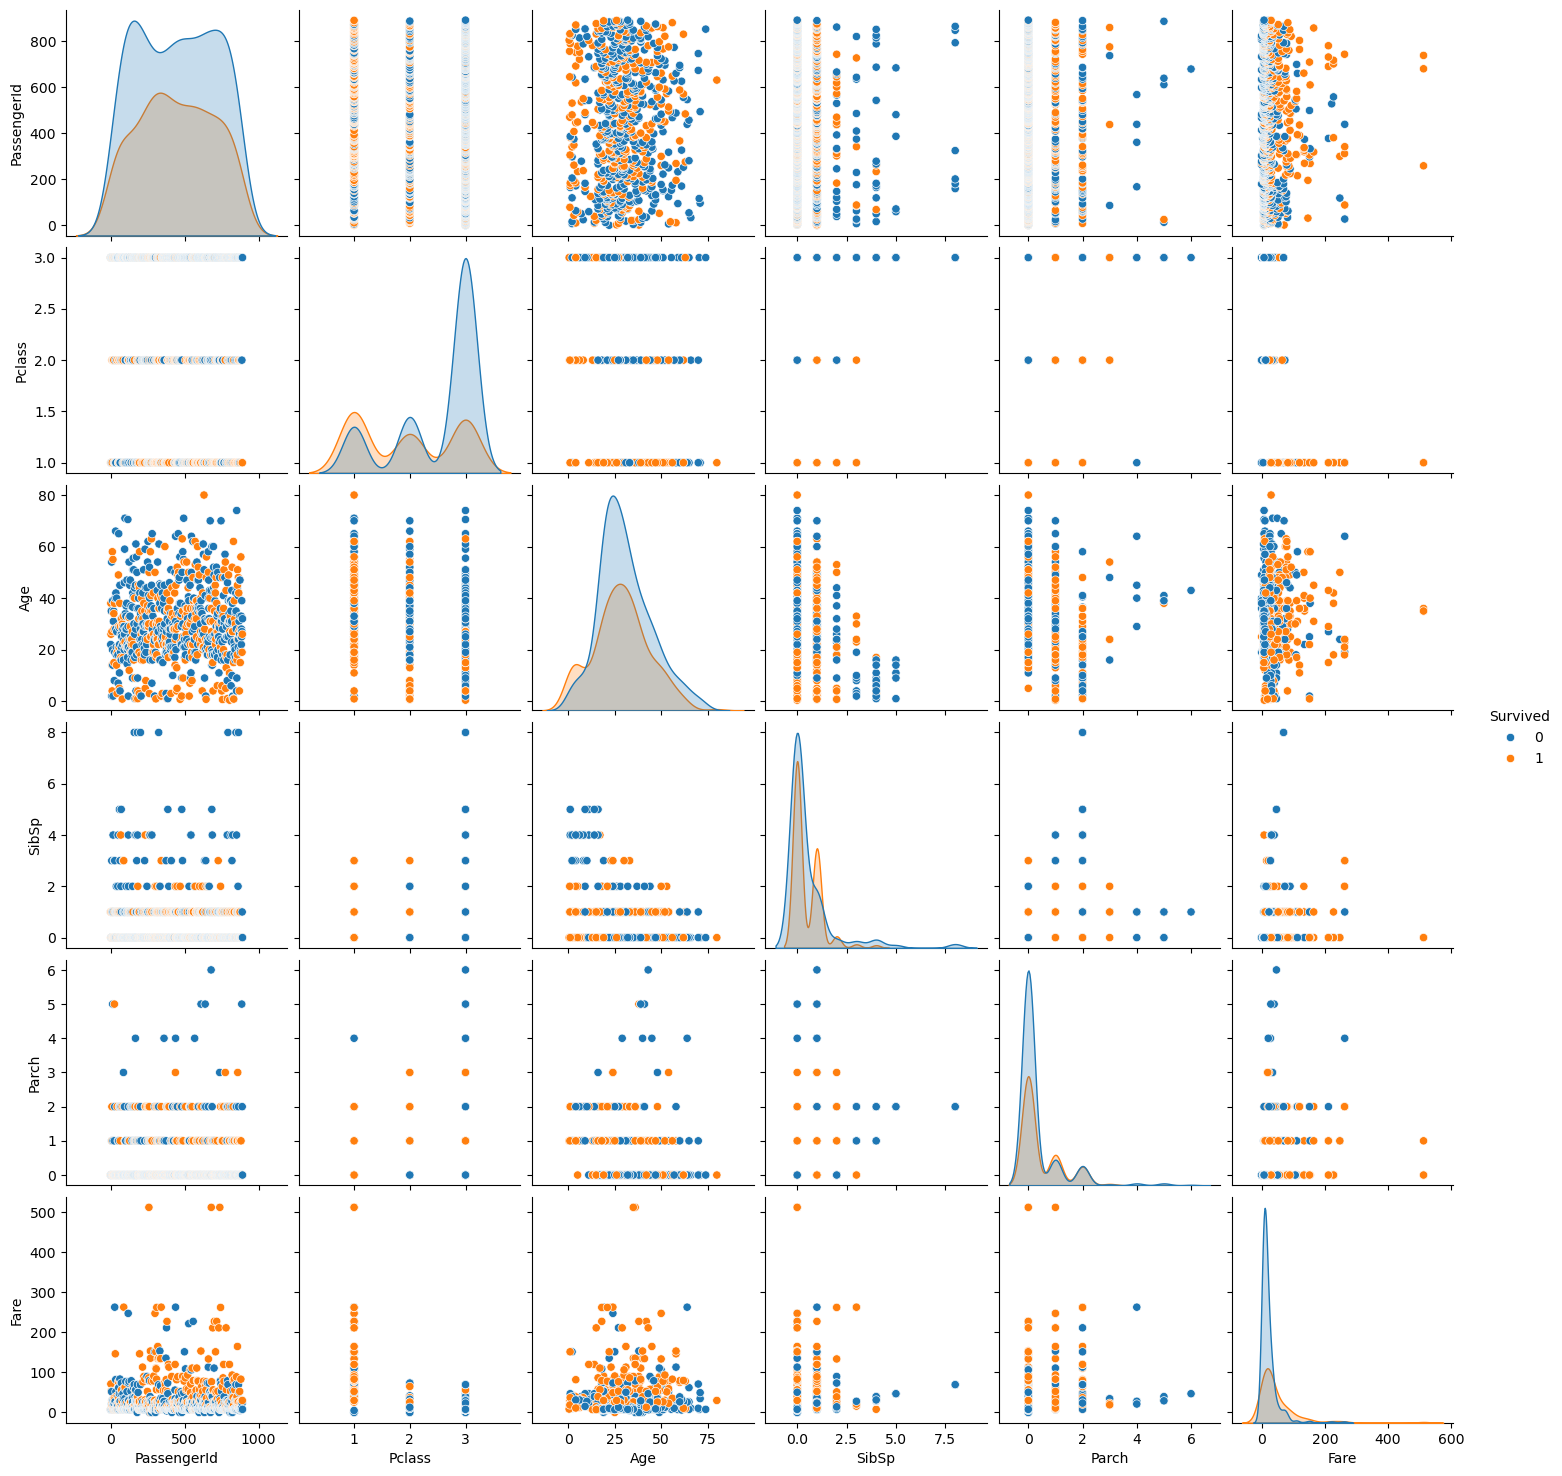

In [44]:
sns.pairplot(data,hue = 'Survived')
plt.show()